In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import zipfile
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import RobustScaler, StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

In [2]:
zf = zipfile.ZipFile('C:/Users/Serueja/Downloads/house-prices-advanced-regression-techniques.zip')
test = pd.read_csv(zf.open('test.csv'))
train = pd.read_csv(zf.open('train.csv'))

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

In [5]:
X_train = pd.get_dummies(X_train)

In [6]:
X_train.fillna(value=0, inplace=True)

In [7]:
model = tree.DecisionTreeClassifier()

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index)

In [11]:
y_pred = pd.DataFrame(best_clf.predict(X_train), index=X_train.index)

<AxesSubplot:>

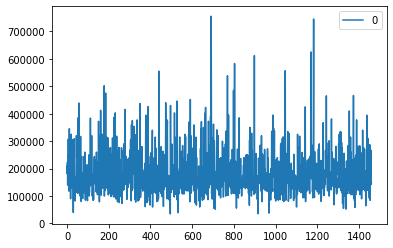

In [18]:
y_pred.plot()

In [19]:
result = pd.concat([y_pred, y_train], axis=1, join='inner')

In [20]:
result.rename(columns={0: "PredPrice"}, inplace=True)

<AxesSubplot:>

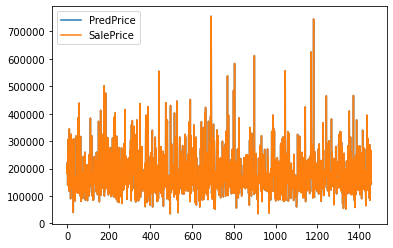

In [21]:
result.plot()

In [22]:
print(y_pred.head())
print(y_train.head())

        0
0  208500
1  181500
2  223500
3  140000
4  250000
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [10]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth' : range(1,30)}
grid_search_cv_clf = GridSearchCV(model, parameters, cv = 5)
np.random.seed(0)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_train, y_train)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = best_clf.predict(X_train)
#precision_score(y_train, y_pred)
#recall_score(y_train, y_pred)

c:\Users\Serueja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
model = tree.DecisionTreeClassifier()


In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = best_clf.predict(X_train)
precision_score(y_train, y_pred)
recall_score(y_train, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].